In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../../All_data_sets/dl/Churn_Modelling.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## No null values

## rename the columns

In [8]:
df.columns = [col.lower() for col in df.columns]

In [9]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## delete the unwanted columns

In [10]:
delete_col  = ['rownumber', 'customerid', 'surname']

In [11]:
df.drop( columns=delete_col , inplace=True )

In [12]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 11)

## convert categorical column values into lower case

In [14]:
df['geography'] = df['geography'].apply( lambda x:x.lower() )

df['gender'] = df['gender'].str.lower()

In [15]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


## seperate the depenedent and independent

In [16]:
X = df.drop( columns='exited' )

y = df['exited']

## split the data into train test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test , y_train , y_test = train_test_split( X,y,test_size=0.3,random_state=43 )

In [19]:
cat_cols = [ col for col in X_train.columns if X_train[col].dtype == 'O' ]
num_cols = [ col for col in X_train.columns if X_train[col].dtype != 'O' ]

In [20]:
cat_cols

['geography', 'gender']

In [21]:
num_cols

['creditscore',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary']

In [22]:
for col in cat_cols:
    print(col)
    print( df[col].unique() )

geography
['france' 'spain' 'germany']
gender
['female' 'male']


In [23]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
ohe = OneHotEncoder( drop='first' , dtype=np.int32, sparse_output=False )
scaler = StandardScaler(  )

In [25]:
column_transformer = ColumnTransformer( 
    transformers=[
    ('encoder' , ohe , cat_cols),
    ('scale' , scaler,num_cols) ] , 
    
    remainder='passthrough'
)

In [26]:
X_train_transformed = column_transformer.fit_transform( X_train )

X_test_transformed = column_transformer.transform( X_test )

In [27]:
column_transformer.get_feature_names_out()

array(['encoder__geography_germany', 'encoder__geography_spain',
       'encoder__gender_male', 'scale__creditscore', 'scale__age',
       'scale__tenure', 'scale__balance', 'scale__numofproducts',
       'scale__hascrcard', 'scale__isactivemember',
       'scale__estimatedsalary'], dtype=object)

# ANN IMPLEMENTATION

## import the libraries

In [28]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [29]:
model = Sequential(
    [
        # this is a hidden layer-1 connected to input layer with feature of 11
        Dense( 64 , activation='relu' , input_shape = ( X_test_transformed.shape[1], ) ), 
        
        Dense( 32 , activation='relu'  ), # this is a hidden layer-2 connected to HL-1
        
        Dense( 16 , activation='relu'  ), # this is a hidden layer-3 connected to HL-2
        
        Dense( 1 , activation='sigmoid'  ), # this is a output layer
    ]
)

## summary of the model

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

## compile the model

In [31]:
optimizers = tf.keras.optimizers.Adam(learning_rate=0.01)

loss = tf.keras.losses.BinaryCrossentropy()

In [32]:
model.compile( optimizer=optimizers , loss="binary_crossentropy" , metrics=['accuracy'] )

## set up teh tensorboard

In [33]:
log_dir = "logs/fit" 

tensorflow_callback = TensorBoard( log_dir=log_dir , histogram_freq=1 )

## Early stop callback

In [34]:
early_stop = EarlyStopping( monitor='val_loss' , patience=10 , restore_best_weights=True )

## Training the model

In [35]:
history = model.fit(
    X_train_transformed , y_train , validation_data = ( X_test_transformed , y_test) , epochs = 100,
    callbacks = [ tensorflow_callback , early_stop ]
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8193 - loss: 0.4332 - val_accuracy: 0.8507 - val_loss: 0.3687
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8574 - loss: 0.3464 - val_accuracy: 0.8603 - val_loss: 0.3419
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3418 - val_accuracy: 0.8593 - val_loss: 0.3518
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8559 - loss: 0.3527 - val_accuracy: 0.8580 - val_loss: 0.3420
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8551 - loss: 0.3484 - val_accuracy: 0.8613 - val_loss: 0.3474
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3488 - val_accuracy: 0.8587 - val_loss: 0.3474
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8611 - loss: 0.3362 - val_accuracy: 0.8577 - val_loss: 0.3475
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8713 - loss: 0.3202 - val_accu

## Load the Tensorboard Extension

In [36]:
# %load_ext tensorboard

In [37]:
# %tensorboard --log_dir /logs/fit

In [38]:
df.head(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1


In [39]:
new_sample = pd.DataFrame([[608	,'spain',	'female',	41,	1	,83807.86,	1,	0,	1,	112542.58	]] , columns=df.columns[ : -1])
new_sample

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,608,spain,female,41,1,83807.86,1,0,1,112542.58


In [40]:
new_sample_transformed = column_transformer.transform(new_sample)
new_sample_transformed

array([[ 0.        ,  1.        ,  0.        , -0.43009919,  0.18334275,
        -1.39348177,  0.12029411, -0.91711597, -1.54590766,  0.97795717,
         0.22985047]])

In [41]:
pd.DataFrame( new_sample_transformed , columns=column_transformer.get_feature_names_out() )

,encoder__geography_germany,encoder__geography_spain,encoder__gender_male,scale__creditscore,scale__age,scale__tenure,scale__balance,scale__numofproducts,scale__hascrcard,scale__isactivemember,scale__estimatedsalary
0,0.0,1.0,0.0,-0.430099,0.183343,-1.393482,0.120294,-0.917116,-1.545908,0.977957,0.22985


In [42]:
pred = model.predict( new_sample_transformed  )

print(pred[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0.31974238


In [43]:
if pred[0][0] > 0.5 :
    print('The Customer is likely to churn')
else:
    print('The Customer is not likely to churn')

The Customer is not likely to churn


## Evaluate the Model

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [45]:
# Predictions
y_pred_prob = model.predict(X_test_transformed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2387
           1       0.79      0.43      0.56       613

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

Confusion Matrix:
 [[2318   69]
 [ 350  263]]
ROC-AUC Score: 0.8599236894242945


## Plot Training History

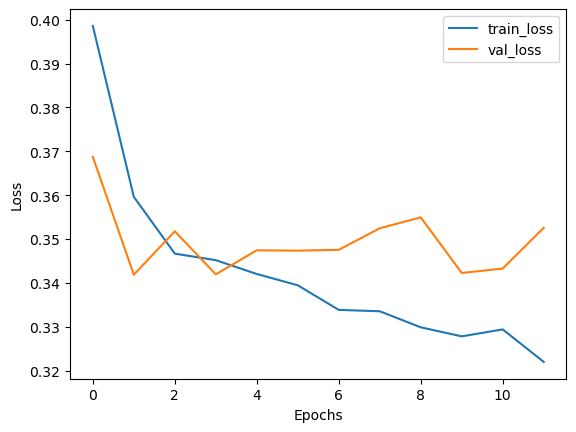

In [46]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the preprocessing technique and model

In [47]:
import pickle

In [48]:
# Save preprocessor
with open("./saved_models/preprocessor.pkl", "wb") as f:
    pickle.dump(column_transformer, f)

In [49]:
# Save ANN model (must use Keras method, pickle won’t work)
model.save("./saved_models/churn_model.h5")  # HDF5 format

## load back preprocessor and model

In [50]:
from tensorflow.keras.models import load_model

In [51]:
# Load preprocessor
with open("./saved_models/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

# Load ANN model
ann_model = load_model("./saved_models/churn_model.h5")

# Example new sample
new_sample = pd.DataFrame(
    [[619, 'france', 'female', 42, 2, 0.00, 1, 1, 1, 101348.88]],
    columns=df.columns[:-1]
)

# Transform new sample
new_sample_transformed = preprocessor.transform(new_sample)

# Predict
pred = ann_model.predict(new_sample_transformed)

if pred[0][0] > 0.5 :
    print('The Customer is likely to churn')
else:
    print('The Customer is not likely to churn')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The Customer is not likely to churn
